We shall start by importing the essential Python libraries. 

In [1]:
### IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from sklearn.impute import SimpleImputer

Next, we import the data and display the top 10 rows.

In [2]:
### IMPORTING DATA
stroke = pd.read_csv('healthcare-dataset-stroke-data.csv', na_values = [np.NaN, ' '])
stroke.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


We identify 'stroke' as our target variable since we are trying to predict the people who will likely suffer from a stroke in future. Also, right away we can say that 'id' is a redundant feature as it provides no effect on the outcome. So, 'id' needs to be eliminated from the dataset. 


Let us now see the dimensions of this dataset.

In [3]:
stroke.shape

(5110, 12)

So, we have 5110 samples and 12 features. Out of the 12 features, we have 'stroke' as our target and 'id' is redundant; that leaves us with 10 features which are to be used to predict the outcome. 


Next, let us look at the datatypes of each of these features.

In [4]:
stroke.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

This tells us that the dataset has 7 numerical datatypes and 5 object datatypes. Of the 7 numerical datatypes, 1 is obviously redundant('id') while the features 'hypertension' and 'heart_disease' appear to be binary. Also, since the output 'stroke' is also binary, so we have just 3(excluding 'id') continuous variables while the rest are all categorical.


Next, let us look at the statistical attributes of these features.

In [5]:
stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Here, we shall focus strictly on the continuous variables i.e. 'age', 'avg_glucose_level' and 'bmi'. If we compare the means of each of these features to their respective medians(50%), we see that, while being almost equal for both 'age' and 'bmi', the mean for 'avg_glucose_level' is higher than it's median hinting possible presence of outliers. Also the range of values for 'avg_glucose_level', calculated as (max - min), seems very high(>200).


Now, let's create a pandas dataframe from this dataset. We shall also eliminate the redundant feature 'id' by simply dropping it.

In [6]:
### CREATING A PANDAS DATAFRAME
df = pd.DataFrame(stroke)
df = df.drop(['id'], axis = 1)
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


Now, we shall start analysing our data. We do this by first taking one variable at a time, then two and then a combination of more variables. Also, since we have both continuous and categorical variables in our dataframe, it would be wise to do the analysis eparately for those two types.


So, we shall start by looking at the categorical features. We perform Univariate Analysis by making barplots which will show us the number of samples which fall under the different levels of a categorical variable.

Text(0, 0.5, '')

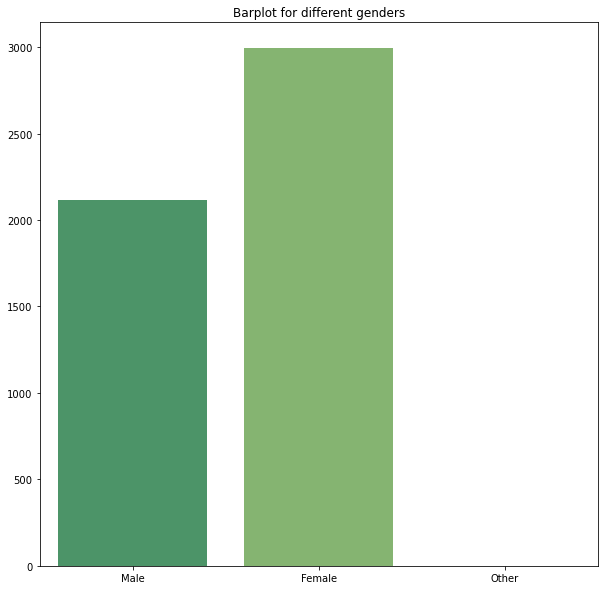

In [7]:
### UNIVARIATE ANALYSIS - CATEGORICAL
plt.figure(figsize = (10, 10))
sns.countplot(x = 'gender', data = df, palette = 'summer')
plt.title('Barplot for different genders')
plt.xlabel('')
plt.ylabel('')

Most people in our dataset are females while there might be a very small amount of people belonging to other genders beside the two dominant ones.

Text(0, 0.5, '')

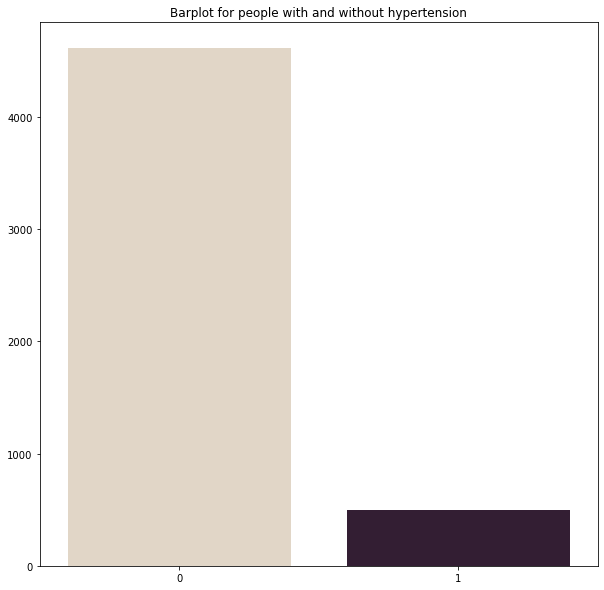

In [8]:
plt.figure(figsize = (10, 10))
sns.countplot(x = 'hypertension', data = df, palette = 'ch:.25')
plt.title('Barplot for people with and without hypertension')
plt.xlabel('')
plt.ylabel('')

Significant amount of people in the dataset dont seem to suffer from hypertension.

Text(0, 0.5, '')

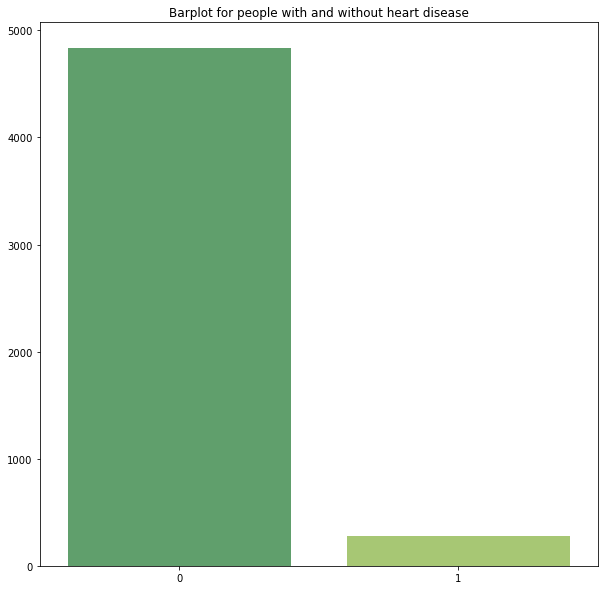

In [9]:
plt.figure(figsize = (10, 10))
sns.countplot(x = 'heart_disease', data = df, palette = 'summer')
plt.title('Barplot for people with and without heart disease')
plt.xlabel('')
plt.ylabel('')

Similar to hypertension, significant amount of people also dont have heart disease.

Text(0, 0.5, '')

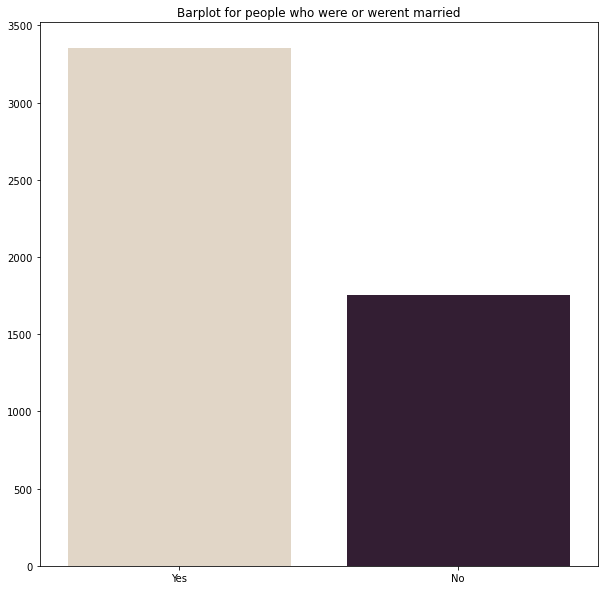

In [10]:
plt.figure(figsize = (10, 10))
sns.countplot(x = 'ever_married', data = df, palette = 'ch:.25')
plt.title('Barplot for people who were or werent married')
plt.xlabel('')
plt.ylabel('')

Majority of people seem to have been married.

Text(0, 0.5, '')

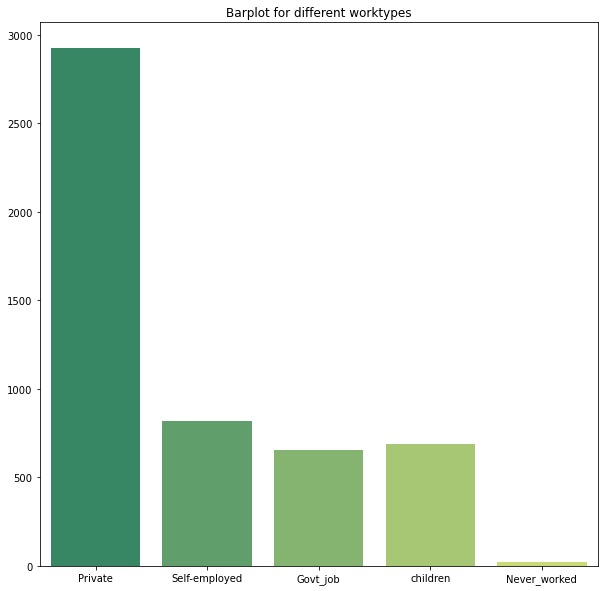

In [11]:
plt.figure(figsize = (10, 10))
sns.countplot(x = 'work_type', data = df, palette = 'summer')
plt.title('Barplot for different worktypes')
plt.xlabel('')
plt.ylabel('')

Here we see that an overwhelming amount of people in the dataset are working for private companies. The amount of people who are either self-employed or working for the government or are infact children, is almost similar. A small amount of people have never worked.

Text(0, 0.5, '')

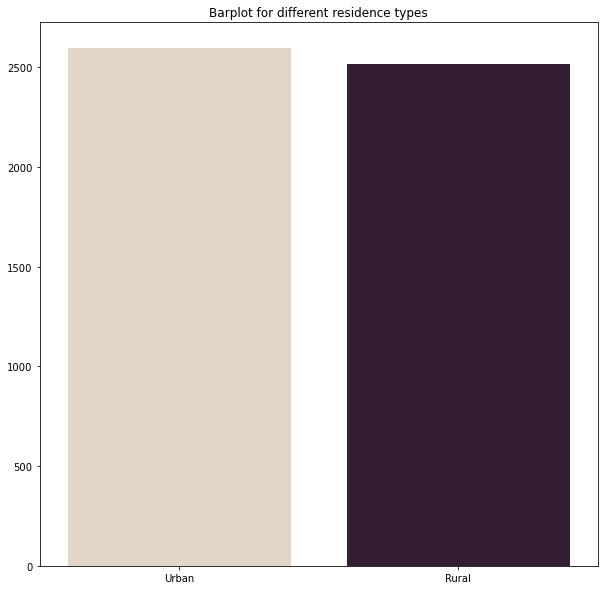

In [12]:
plt.figure(figsize = (10, 10))
sns.countplot(x = 'Residence_type', data = df, palette = 'ch:.25')
plt.title('Barplot for different residence types')
plt.xlabel('')
plt.ylabel('')

Here, the amount of people belonging to the two levels are almost the same i.e. the dataset has an equal number of people who live in the urban and rural areas.

Text(0, 0.5, '')

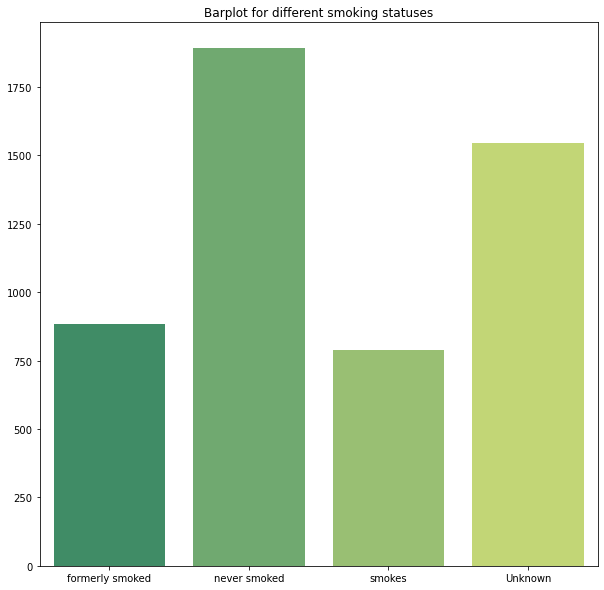

In [13]:
plt.figure(figsize = (10, 10))
sns.countplot(x = 'smoking_status', data = df, palette = 'summer')
plt.title('Barplot for different smoking statuses')
plt.xlabel('')
plt.ylabel('')

Though it looks like our dataset contains a lot of non-smokers compared to smokers or those who used to be one, we should take it with a grain of salt since it appears that a lot of people have refused to disclose their status and so we have a significant amount of people whose smoking status appears unknown.

Text(0, 0.5, '')

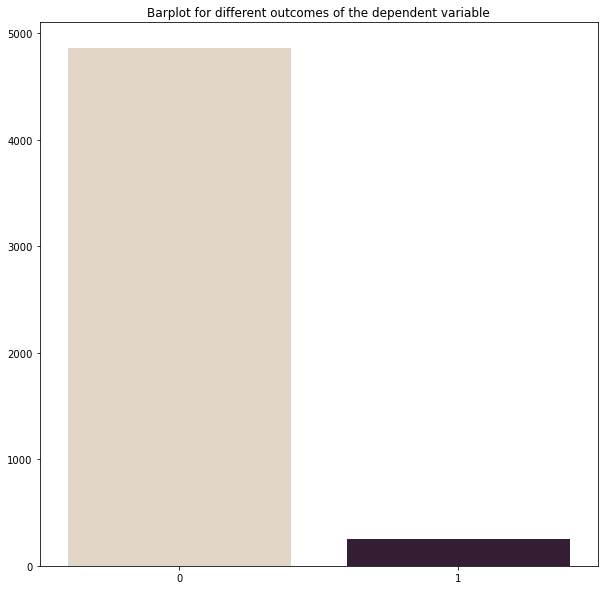

In [14]:
plt.figure(figsize = (10, 10))
sns.countplot(x = 'stroke', data = df, palette = 'ch:.25')
plt.title('Barplot for different outcomes of the dependent variable')
plt.xlabel('')
plt.ylabel('')

Of all the univariate analysis we've done so far, this is the most significant one. From the above barplot of the dependent variable it appears that the number of people who didn't suffer from stroke outweighs the people who did by quite a stretch. This means that we have an unbalanced dataset which will be difficult to work with if we are to build a good model. However, we can overcome this by either downsampling the dominant level or upsampling the recessive level or simply giving weights to the different levels. For now, we shall leave it as it is.


Next, let us perform Bivariate Analysis by taking two categorical features at a time. Since 'stroke' is the dependent variable, we shall take 'stroke' as one variable and plot it's various levels against the levels of other categorical variables.

Text(0, 0.5, '')

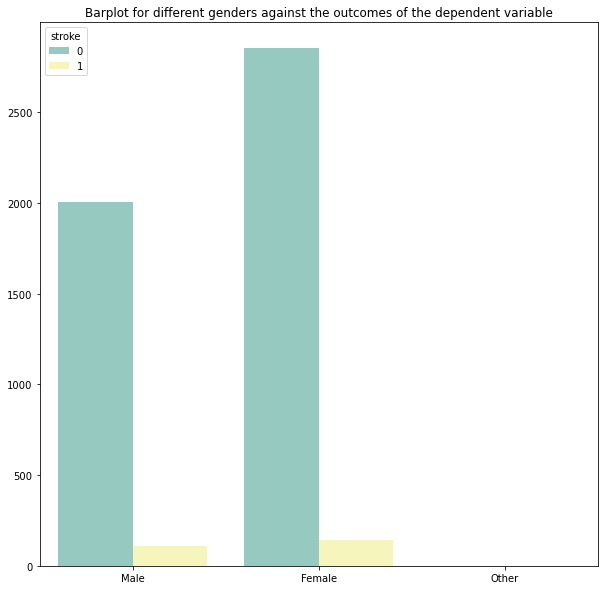

In [15]:
### BIVARIATE ANALYSIS - CATEGORICAL VS CATEGORICAL
plt.figure(figsize = (10, 10))
sns.countplot(x = 'gender', hue = 'stroke', data = df, palette = 'Set3')
plt.title('Barplot for different genders against the outcomes of the dependent variable')
plt.xlabel('')
plt.ylabel('')

It appears that females suffer from more strokes than males but it isn't much significant because we already knew that the dataset had more females than males.

Text(0, 0.5, '')

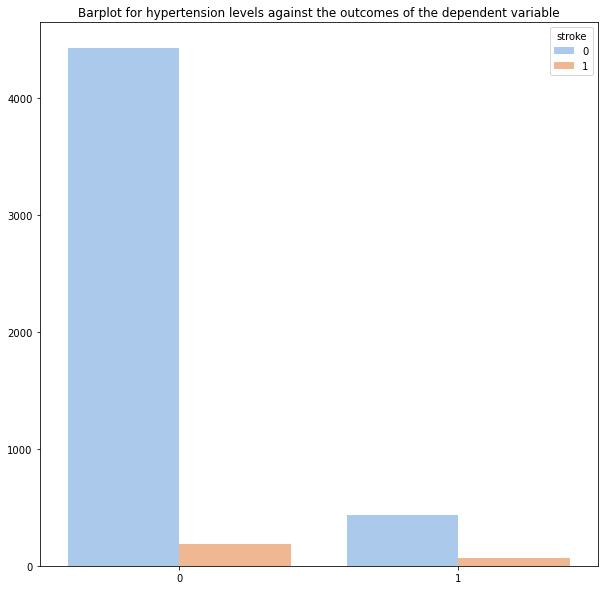

In [16]:
plt.figure(figsize = (10, 10))
sns.countplot(x = 'hypertension', hue = 'stroke', data = df, palette = 'pastel')
plt.title('Barplot for hypertension levels against the outcomes of the dependent variable')
plt.xlabel('')
plt.ylabel('')

Again, this doesn't help us because of the huge imbalance between the two levels of hypertension.

Text(0, 0.5, '')

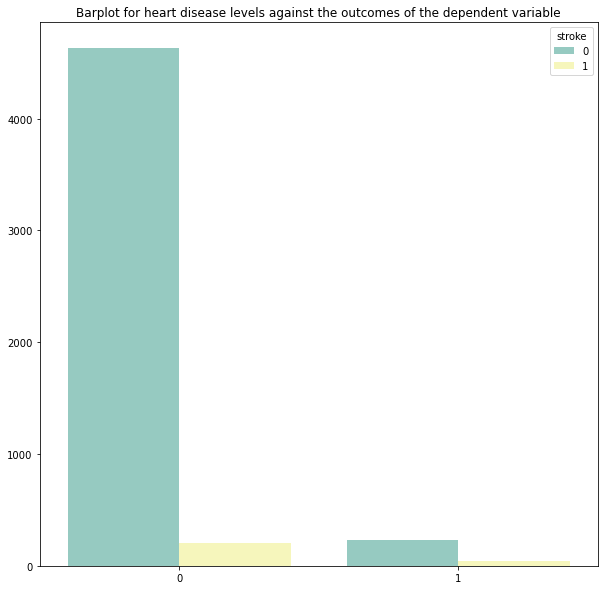

In [17]:
plt.figure(figsize = (10, 10))
sns.countplot(x = 'heart_disease', hue = 'stroke', data = df, palette = 'Set3')
plt.title('Barplot for heart disease levels against the outcomes of the dependent variable')
plt.xlabel('')
plt.ylabel('')

Same as before.

Text(0, 0.5, '')

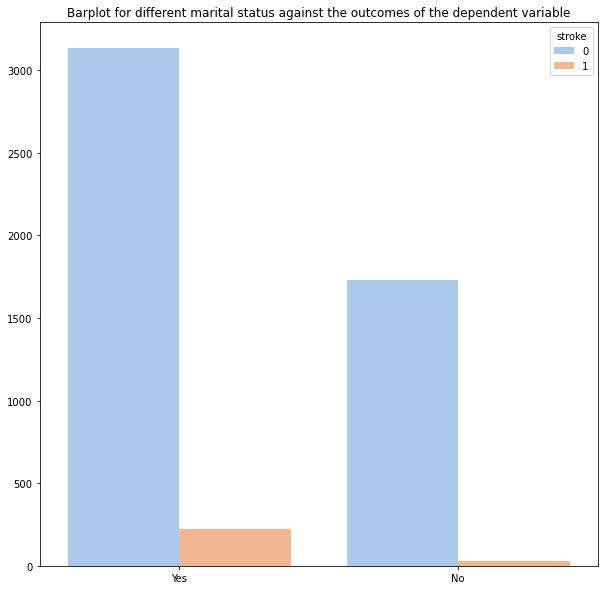

In [18]:
plt.figure(figsize = (10, 10))
sns.countplot(x = 'ever_married', hue = 'stroke', data = df, palette = 'pastel')
plt.title('Barplot for different marital status against the outcomes of the dependent variable')
plt.xlabel('')
plt.ylabel('')

Again, as expected due to the imbalance.

Text(0, 0.5, '')

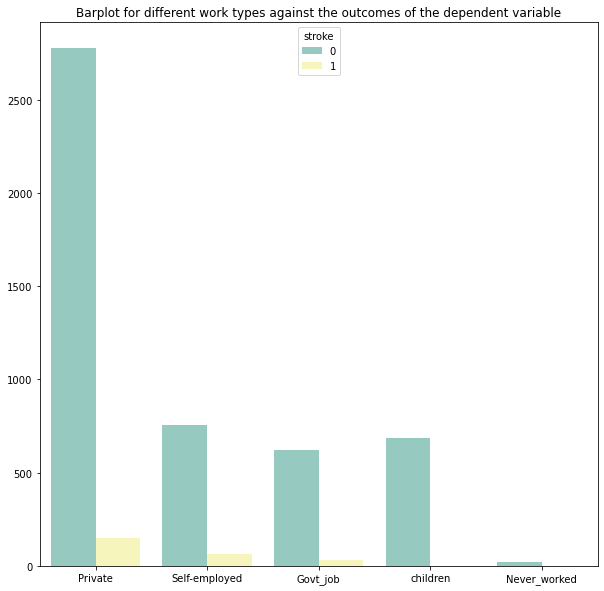

In [19]:
plt.figure(figsize = (10, 10))
sns.countplot(x = 'work_type', hue = 'stroke', data = df, palette = 'Set3')
plt.title('Barplot for different work types against the outcomes of the dependent variable')
plt.xlabel('')
plt.ylabel('')

Unlike the previous plots, this one gives us some insight. While it was obvious that the amount of people working in private companies will be dominant in both levels of the dependent variable, the next three 'work_type' levels give us some interesting insights. Although the amount of self-employed, government workers and children are almost similar, it appears that children rarely suffer from stroke compared to the other two, which is quite obvious if we think about it.

Text(0, 0.5, '')

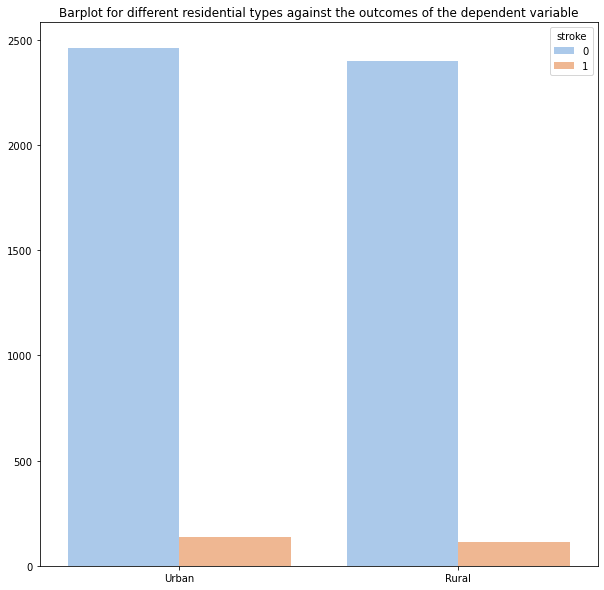

In [20]:
plt.figure(figsize = (10, 10))
sns.countplot(x = 'Residence_type', hue = 'stroke', data = df, palette = 'pastel')
plt.title('Barplot for different residential types against the outcomes of the dependent variable')
plt.xlabel('')
plt.ylabel('')

Nothing significant.

Text(0, 0.5, '')

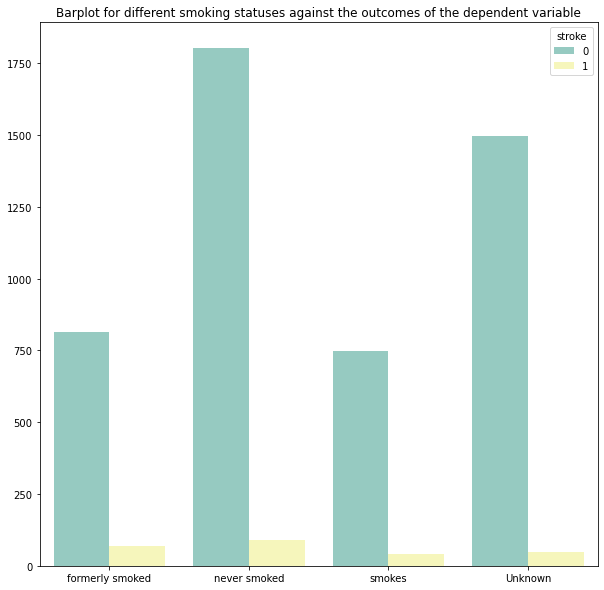

In [21]:
plt.figure(figsize = (10, 10))
sns.countplot(x = 'smoking_status', hue = 'stroke', data = df, palette = 'Set3')
plt.title('Barplot for different smoking statuses against the outcomes of the dependent variable')
plt.xlabel('')
plt.ylabel('')

This is an interesting plot. Despite having a majority of people who never smoked, the amount of people who had stroke are almost similar between the groups who used to smoke and who never did. Also, smokers are not far behind despite having the least number of people. This points to the fact that smoking might be a major factor for heart strokes.


Now, we perform Multivariate Analysis by taking more than two categorical variables at a time, one of which is 'stroke'.

<Figure size 720x720 with 0 Axes>

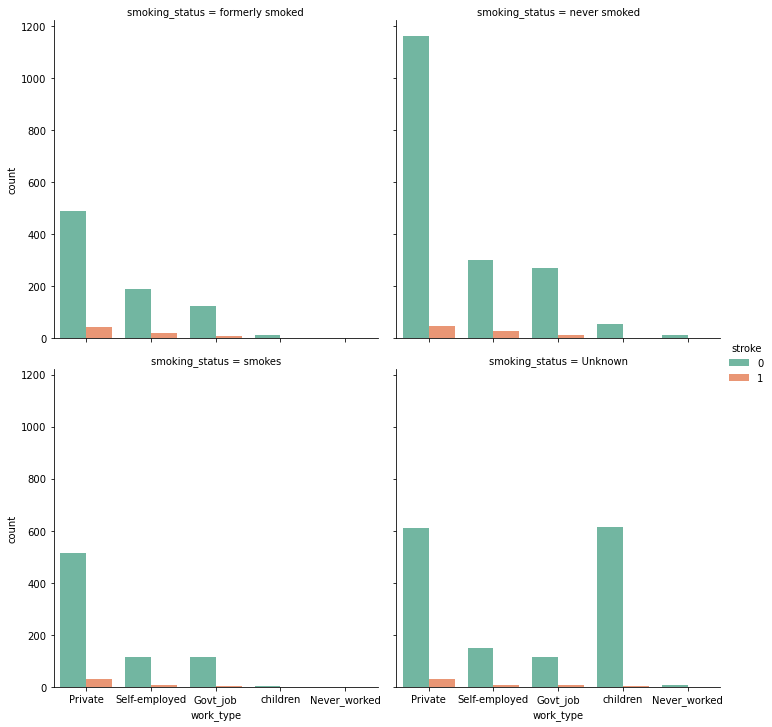

In [22]:
### MULTIVARIATE ANALYSIS - CATEGORICAL VARIABLES
plt.figure(figsize = (10, 10))
sns.catplot(x = 'work_type', hue = 'stroke', col = 'smoking_status', kind = 'count', data = df, palette = 'Set2', col_wrap = 2)

On plotting the different levels of smoking status with stroke levels for the different work types, the picture becomes clearer. The fourth plot shows that majority of people who gave their smoking status as unknown were actually children which makes sense. Also, smokers and former smokers working in private companies are more susceptible to having strokes.

<Figure size 720x720 with 0 Axes>

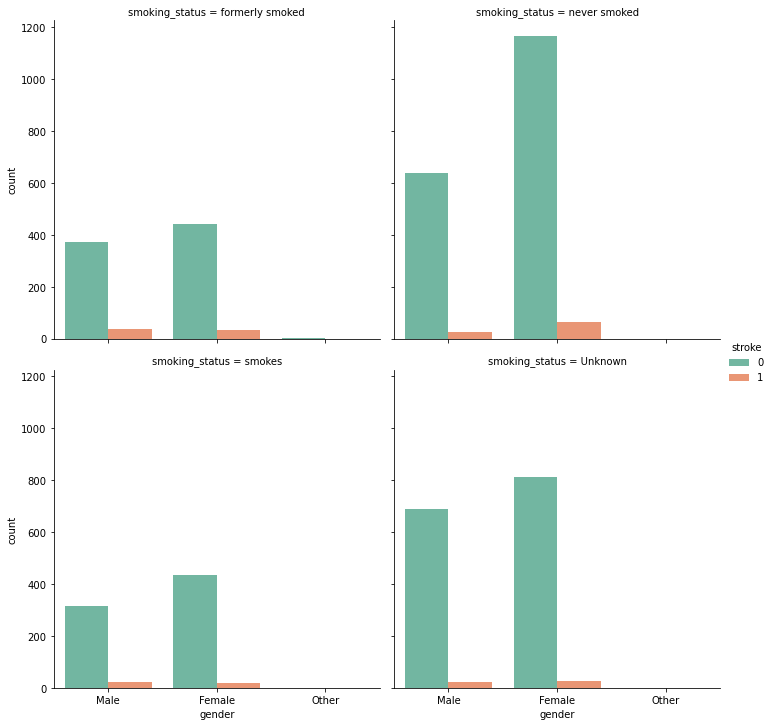

In [23]:
plt.figure(figsize = (10, 10))
sns.catplot(x = 'gender', hue = 'stroke', col = 'smoking_status', data = df, kind = 'count', palette = 'Set2', col_wrap = 2)

On plotting the genders with respect to different smoking statuses, we see that stroke is more commom among male smokers(both former and current) than the female counterparts. This is highlighted by the almost equal number of stroke cases in both genders in the two plots on the left despite there being more females than males. Similar observation is made in the unknown category while non-smokers show a predictable pattern.


For now, we are done with variable analysis. Next, we shall check our data for missing values.

In [24]:
### MISSING VALUE INSPECTION
len(df.loc[np.isnan(df['age'])])/len(df)

0.0

In [25]:
len(df.loc[np.isnan(df['avg_glucose_level'])])/len(df)

0.0

In [26]:
len(df.loc[np.isnan(df['bmi'])])/len(df)

0.03933463796477495

In [27]:
len(df.loc[(df['gender'] != 'Female') & (df['gender'] != 'Male') & (df['gender'] != 'Other')])/len(df)

0.0

In [28]:
len(df.loc[(df['hypertension'] != 0) & (df['hypertension'] != 1)])/len(df)

0.0

In [29]:
len(df.loc[(df['heart_disease'] != 0) & (df['heart_disease'] != 1)])/len(df)

0.0

In [30]:
len(df.loc[(df['ever_married'] != 'Yes') & (df['ever_married'] != 'No')])/len(df)

0.0

In [31]:
len(df.loc[(df['work_type'] != 'Private') & (df['work_type'] != 'Self-employed') & (df['work_type'] != 'children') &
          (df['work_type'] != 'Govt_job') & (df['work_type'] != 'Never_worked')])/len(df)

0.0

In [32]:
len(df.loc[(df['Residence_type'] != 'Urban') & (df['Residence_type'] != 'Rural')])/len(df)

0.0

In [33]:
len(df.loc[(df['smoking_status'] != 'never smoked') & (df['smoking_status'] != 'Unknown') & 
           (df['smoking_status'] != 'formerly smoked') & (df['smoking_status'] != 'smokes')])/len(df)

0.0

So, 3.93% of the total rows have values missing for 'bmi'. For missing value treatment, we can either delete these rows or use imputation methods like KNN or mean imputation. Here, we shall perform the latter. First, we shall store the feature names in dictionaries to make our task easier down the line.

In [34]:
### CREATING DICTIONARIES OF VARIABLE NAMES
num_vars = df.select_dtypes(include = ['int64', 'float64'])
cat_vars = df.select_dtypes(include = 'object')
feature_names = collections.defaultdict(str)
for name in num_vars.columns:
    feature_names[name]
for name in cat_vars.columns:
    feature_names[name]
feature_names

defaultdict(str,
            {'age': '',
             'hypertension': '',
             'heart_disease': '',
             'avg_glucose_level': '',
             'bmi': '',
             'stroke': '',
             'gender': '',
             'ever_married': '',
             'work_type': '',
             'Residence_type': '',
             'smoking_status': ''})

Next, we simply impute the mean value of 'bmi' in place of the missing terms. Note that the median would be a much better choice for imputation since we haven't treated the dataset for outliers yet which means that the mean will be highly influenced by the existing outliers. Here, since the mean and median for 'bmi' are almost equal, it doesn't make much difference. So, we impute the mean and modify to get a new dataframe.

In [35]:
### MISSING VALUE TREATMENT
mean_imputer = SimpleImputer(strategy = 'mean')
imputed_vars = mean_imputer.fit_transform(num_vars)
df_imputed = pd.DataFrame(np.hstack([imputed_vars, cat_vars]), columns = feature_names)
df_imputed.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender,ever_married,work_type,Residence_type,smoking_status
0,67,0,1,228.69,36.6,1,Male,Yes,Private,Urban,formerly smoked
1,61,0,0,202.21,28.8932,1,Female,Yes,Self-employed,Rural,never smoked
2,80,0,1,105.92,32.5,1,Male,Yes,Private,Rural,never smoked
3,49,0,0,171.23,34.4,1,Female,Yes,Private,Urban,smokes
4,79,1,0,174.12,24,1,Female,Yes,Self-employed,Rural,never smoked


In [36]:
df_imputed.dtypes

age                  object
hypertension         object
heart_disease        object
avg_glucose_level    object
bmi                  object
stroke               object
gender               object
ever_married         object
work_type            object
Residence_type       object
smoking_status       object
dtype: object

In [37]:
### CHANGING VARIABLE DATATYPES 
df_imputed['age'] = df_imputed['age'].astype('float64')
df_imputed['hypertension'] = df_imputed['hypertension'].astype('int64')
df_imputed['heart_disease'] = df_imputed['heart_disease'].astype('int64')
df_imputed['avg_glucose_level'] = df_imputed['avg_glucose_level'].astype('float64')
df_imputed['bmi'] = df_imputed['bmi'].astype('float64')
df_imputed['stroke'] = df_imputed['stroke'].astype('int64')

In [38]:
df_imputed.dtypes

age                  float64
hypertension           int64
heart_disease          int64
avg_glucose_level    float64
bmi                  float64
stroke                 int64
gender                object
ever_married          object
work_type             object
Residence_type        object
smoking_status        object
dtype: object

After missing value treatment, we once again move on to Univariate Analysis; this time it is for the continuous variables. We start by making boxplots for the variables to get a rough idea about the five number summary and the existing outliers.

Text(0.5, 1.0, 'Boxplots for the continuous variables')

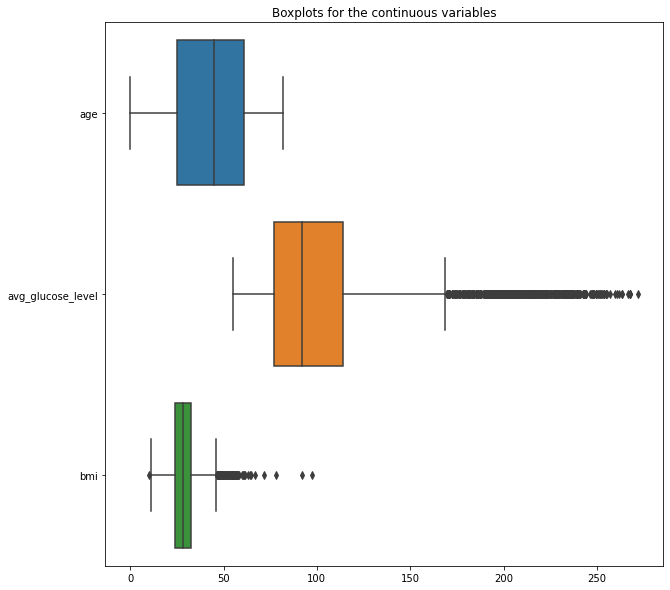

In [39]:
### UNIVARIATE ANALYSIS - CONTINUOUS
pair = num_vars.drop(['hypertension', 'heart_disease', 'stroke'], axis = 1)
plt.figure(figsize = (10, 10))
sns.boxplot(data = df_imputed[pair.columns], orient = 'h')
plt.title('Boxplots for the continuous variables')

Right away, we can see the many outliers in the avg_glucose_level variable.


We can further deep dive into Univariate Analysis by plotting histograms.

Text(0, 0.5, '')

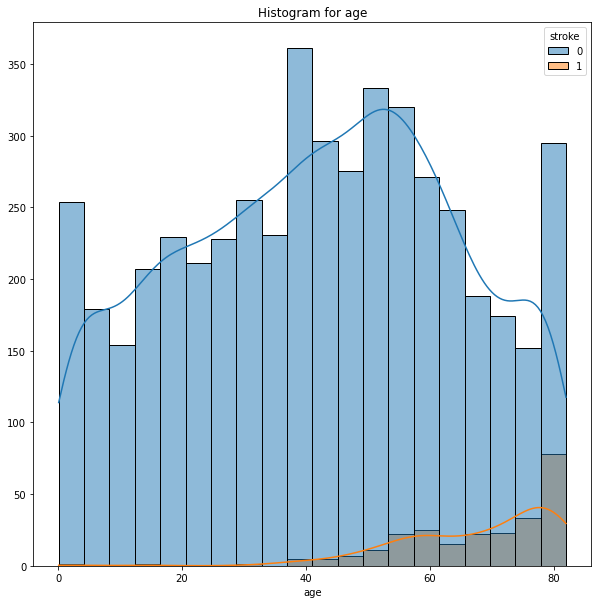

In [40]:
plt.figure(figsize = (10, 10))
sns.histplot(x = 'age', hue = 'stroke', data = df, kde = True)
plt.title('Histogram for age')
plt.ylabel('')

We see that as age increases from the mean, so does the number of cases with stroke. Also, the age of people who do not suffer from stroke follows a normal distribution.

Text(0, 0.5, '')

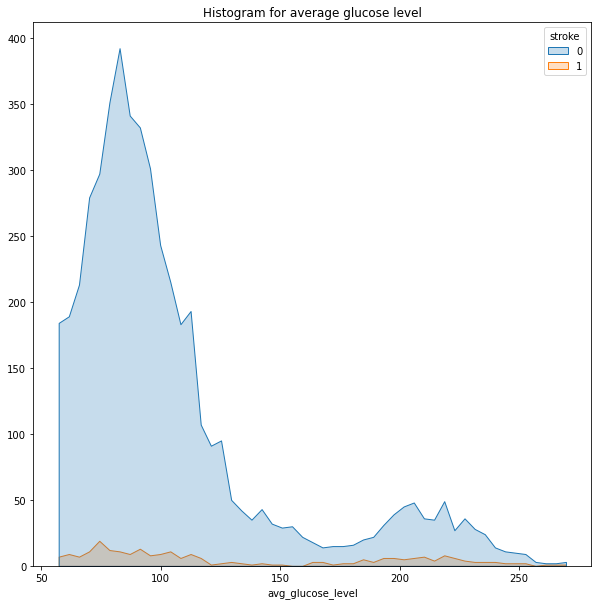

In [41]:
plt.figure(figsize = (10, 10))
sns.histplot(x = 'avg_glucose_level', hue = 'stroke', data = df, element = 'poly')
plt.title('Histogram for average glucose level')
plt.ylabel('')

Majority of people in the dataset have low average glucose level. Despite this, the density of number of people with stroke are almost equal for people with low and high average glucose level indicating that number of stroke cases increases with increase in average glucose level.

Text(0, 0.5, '')

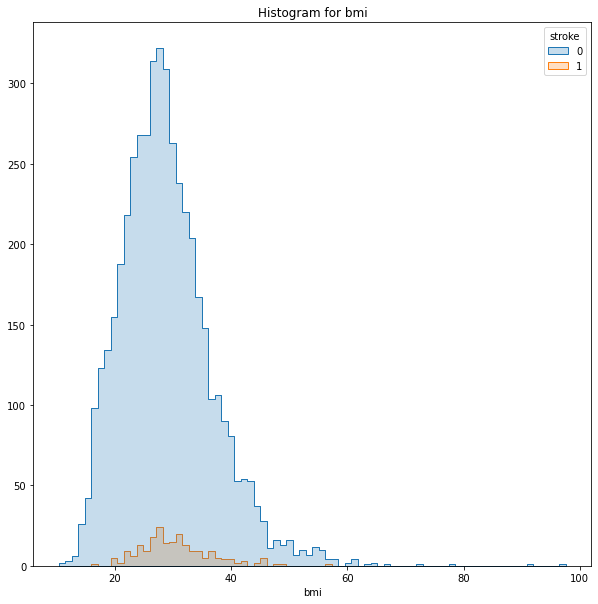

In [42]:
plt.figure(figsize = (10, 10))
sns.histplot(x = 'bmi', hue = 'stroke', data = df, element = 'step')
plt.title('Histogram for bmi')
plt.ylabel('')

The distribution for bmi appears to be right skewed for people with no stroke cases. Majority have bmi between 20 and 40. 


Next, we shall create a scatterplot matrix between the continuous variable which shows us the bivariate relationship among them.

<Figure size 3600x3600 with 0 Axes>

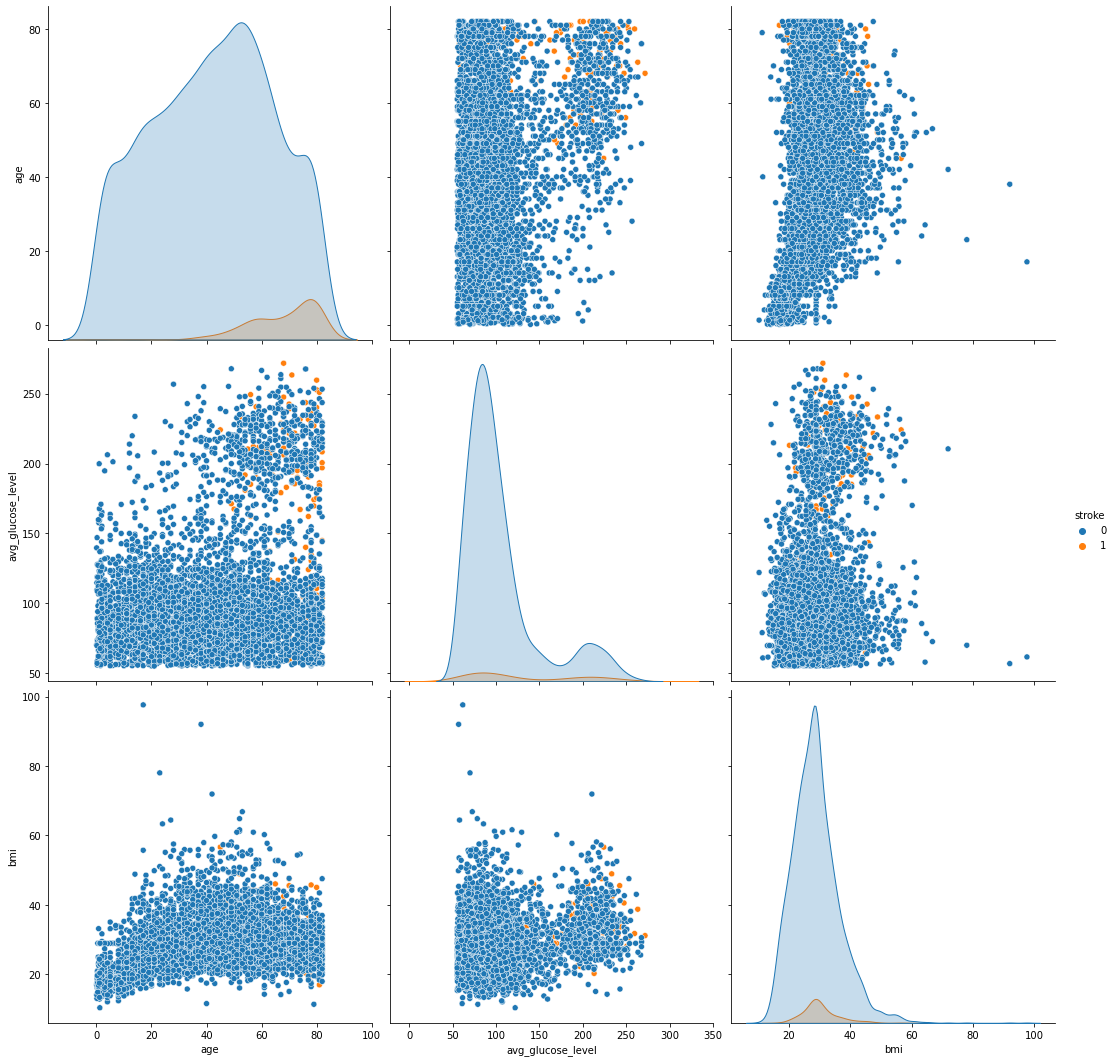

In [43]:
### BIVARIATE ANALYSIS - CONTIINUOUS VS CONTINUOUS (SCATTERPLOT MATRIX)
pair = num_vars.drop(['hypertension', 'heart_disease'], axis = 1)
plt.figure(figsize = (50, 50))
sns.pairplot(df_imputed[pair.columns], hue = 'stroke', height = 5)

If we observe the plot between age and average glucose level, we see that old people are susceptible to having strokes with high glucose level proving more dangerous for them. The same can be said for bmi as seen for the age vs bmi plot; old people with high bmi have more stroke cases.


Now, we shall go for outlier treatment. Again, there are any ways to do this. Here, we simply limit the variables between their resp 5th and 95th percentiles.

In [44]:
### OUTLIER TREATMENT
capping = num_vars.select_dtypes(include = 'float64')
for col in df_imputed.columns:
    if col in capping.columns:
        percentile = df_imputed[col].quantile([0.05, 0.95]).values
        df_imputed[col] = df_imputed[col].clip(lower = percentile[0], upper = percentile[1])

Following outlier treatment, we shall start with the final part of variable analysis: the multivariate amalysis, wherein we take a mixture of continuous and categorical variables and examine the relationships between them.

<Figure size 720x720 with 0 Axes>

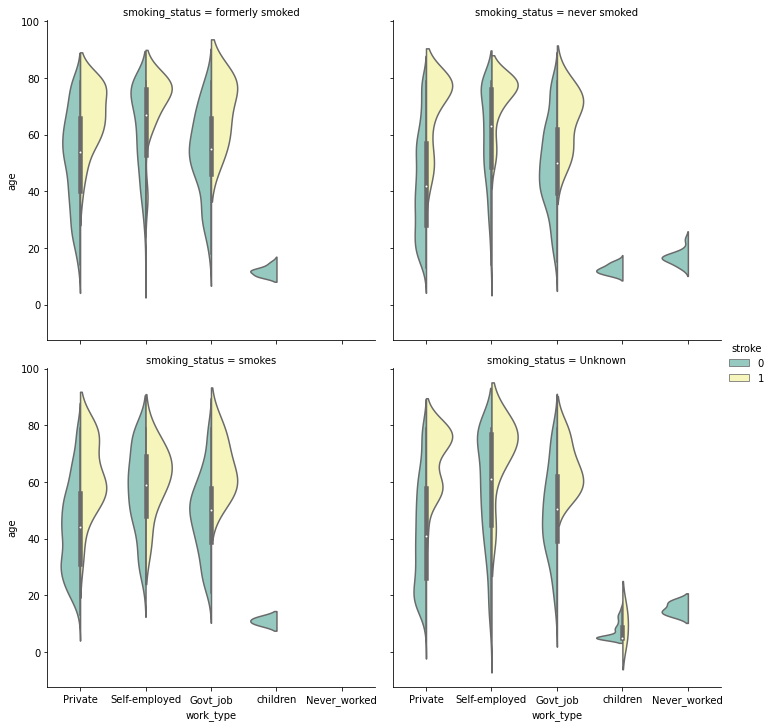

In [45]:
### MULTIVARIATE ANALYSIS - CONTINUOUS AND CATEGORICAL
plt.figure(figsize = (10, 10))
sns.catplot(x = 'work_type', y = 'age', hue = 'stroke', col = 'smoking_status', 
            data = df_imputed, kind = 'violin', split = True, palette = 'Set3', col_wrap = 2)

Here, we see that former and current smokers who work in private companies have an increased chanced of stroke after they turn 40 unlike non-smokers who have more risk after reaching 60. Meanwhile, people working in government jobs have increased chances of stroke after reaching 40 regardless of their smoking status. Smokers who are self-employed are more susceptible as compared to their non-smoking counterparts.

<Figure size 720x720 with 0 Axes>

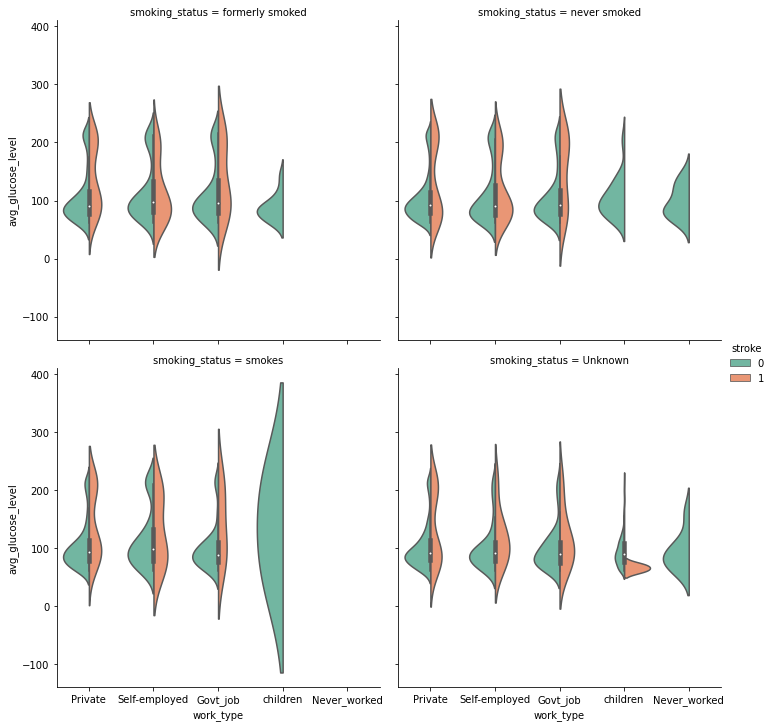

In [46]:
plt.figure(figsize = (10, 10))
sns.catplot(x = 'work_type', y = 'avg_glucose_level', hue = 'stroke', col = 'smoking_status', 
            data = df_imputed, kind = 'violin', split = True, palette = 'Set2', col_wrap = 2)

Here, we see that regardless of the smoking status, a high average glucose level is more susceptible to having a stroke than a lower one.

<Figure size 720x720 with 0 Axes>

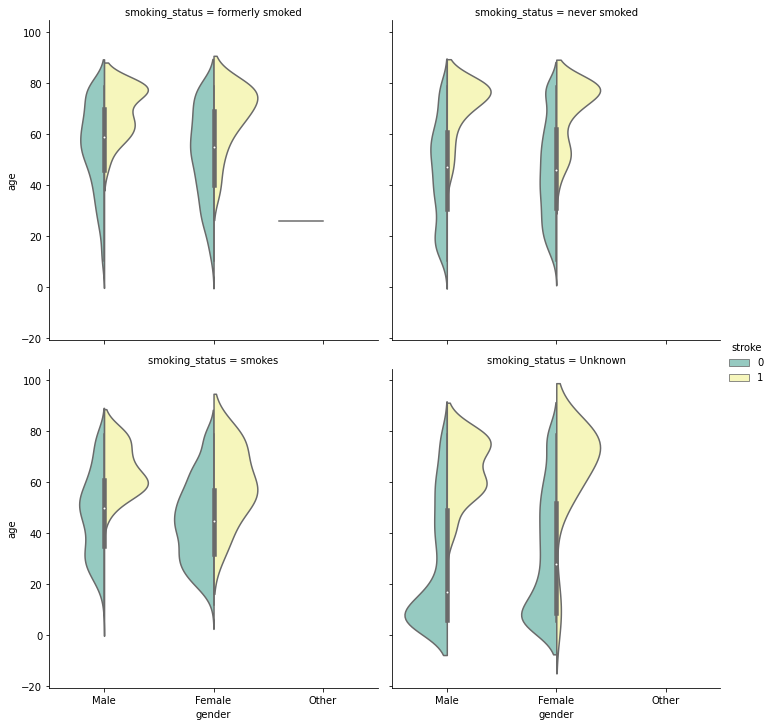

In [47]:
plt.figure(figsize = (10, 10))
sns.catplot(x = 'gender', y = 'age', hue = 'stroke', col = 'smoking_status', 
            data = df_imputed, kind = 'violin', split = True, palette = 'Set3', col_wrap = 2)

Yet again, we see that smoking makes stroke a possibility at a younger age than not smoking. Also, as previously reported, it appears that male smokers are more susceptible to having a stroke than females though the age of onset appears much earlier for female smokers than males.


Next, in order to make models, we shall one hot encode the categorical variables to get binary features which are easier to work with. Remember that some categorical features('hypertension', 'heart_disease' and 'stroke') were already binary. So, we shall turn the remaining ones binary and drop one of each of their levels to serve as reference.

In [48]:
### ONE-HOT ENCODING CATEGORICAL VARIABLES
df_final = pd.get_dummies(df_imputed, columns = ['gender', 'ever_married', 'work_type', 'Residence_type',
                                              'smoking_status'], drop_first = True)

Here's a look at the final dataframe that will be used for model building.

In [49]:
df_final

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,216.2945,36.600000,1,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.2100,28.893237,1,0,0,1,0,0,1,0,0,0,1,0
2,79.0,0,1,105.9200,32.500000,1,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.2300,34.400000,1,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.1200,24.000000,1,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,79.0,1,0,83.7500,28.893237,0,0,0,1,0,1,0,0,1,0,1,0
5106,79.0,0,0,125.2000,40.000000,0,0,0,1,0,0,1,0,1,0,1,0
5107,35.0,0,0,82.9900,30.600000,0,0,0,1,0,0,1,0,0,0,1,0
5108,51.0,0,0,166.2900,25.600000,0,1,0,1,0,1,0,0,0,1,0,0


Lastly, we'll construct a correlation matrix to see if any of the features are highly correlated to each other.

<AxesSubplot:>

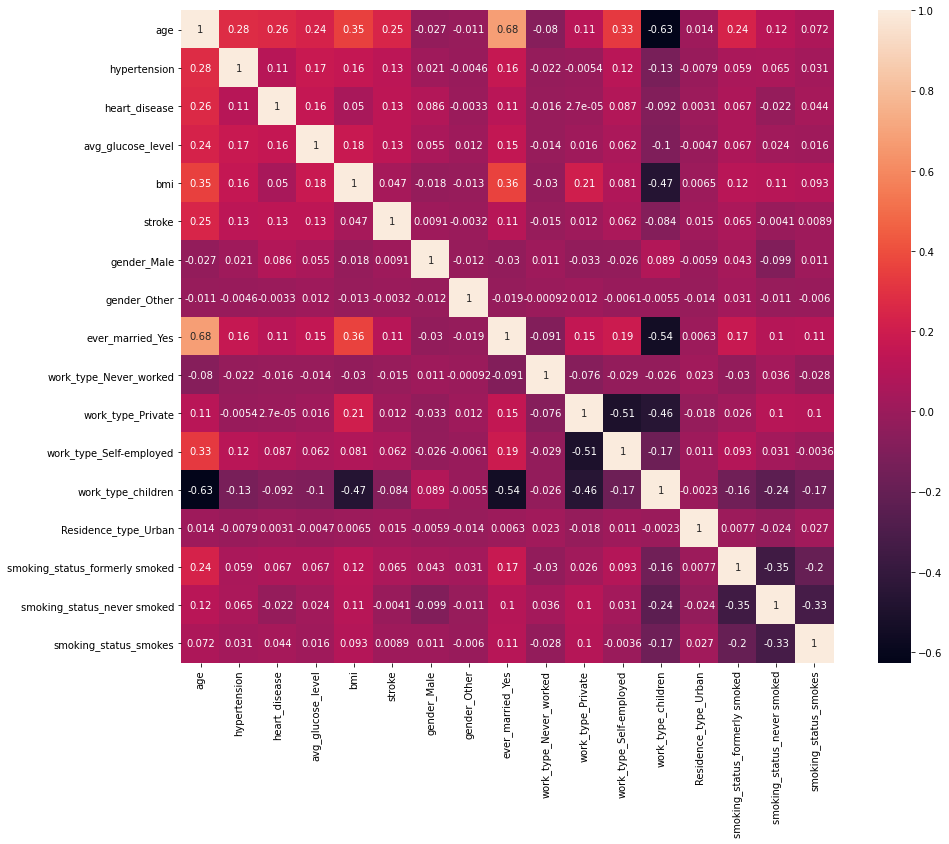

In [50]:
### CREATING CORRELATION MATRIX
plt.figure(figsize = (16, 12))
sns.heatmap(df_final.corr(), annot = True, fmt = '.2g', square = True)

If we take anything greater than 0.5 as a high correlation then we see that age and being married is highly correlated which seems logical if we think about it. Also, being a children means low age, low bmi, not being married and not working in private companies. Also, it's logical that being self-employed doesnt mean that one can work for a private company. Furthermore, being a child will automatically have a negative correlation with being self-employed and working for a private company because they are levels of the same categorical variable. 


If we wish, we can remove some of these highly correlated variables. However, we shall keep all of them intact and use this final dataframe to create predictive models.